In [11]:
import sys 

path_to_engine = r'C:\Data\Work\Code\PartEngine'
sys.path.insert(0, path_to_engine)

from Pre.Sampler.UniformSampler import * # type: ignore
from Pre.Sampler.PartExport     import * # type: ignore 
from Pre.MeshLoader             import * # type: ignore

In [12]:
def save_voxels(voxel_mesh, save_path):
    """
    Exports given voxel grid into *.VTK file

    parameters:
        voxel_mesh (np.array) - 3D (Nx * Ny * Nz) voxel map: 1 for solid, 0 for void
        save_path  (str)      - desired export path, format should be *.VTK

    returns:

    """

    nx,ny,nz = voxel_mesh.shape 
    X, Y, Z  = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing = 'ij')

    grid     = pv.StructuredGrid(X,Y,Z)
    voids    = np.where(voxel_mesh[:-1, :-1, :-1] == 0)
    idx      = np.ravel_multi_index(voids, dims = (nx-1, ny-1, nz-1), order = 'F')

    grid.hide_cells(idx, inplace = True)

    grid.save(save_path)

In [13]:
def save_geometry(geom, filename):
    """
    Exports voxelized geometry to *.TXT file in the format:
    Nx, Ny, Nz
    0 0 0 void_or_solid
    0 0 1 void_or_solid
    ...

    parameters:
        geom (np.array) - 3D (Nx * Ny * Nz) voxel map: 1 for solid, 0 for void 
        filename (str)  - Desired export path, format should be *.TXT

    returns:

    """

    nx, ny, nz = geom.shape
    with open(filename, 'w') as file:
        file.write(f'{nx} {ny} {nz}\n')
        for ix in range(nx):
            for iy in range(ny):
                for iz in range(nz):
                    file.write(f'{ix} {iy} {iz} {int(geom[ix,iy,iz])}\n')
    print(f'Saved to [{filename}]')

In [14]:
path_to_stl = r'C:\Data\Work\Code\LBM\LBM_3D_GPU\Data\Input\droplet_1.stl'
mesh = import_STL(path_to_stl)

2024-12-31 01:12:36  |  Imported mesh: [TriangleMesh with 11904 points and 3968 triangles.]
2024-12-31 01:12:36  |  Mesh size: (2.076555 x 4.337847 x 1.355383)


In [15]:
visualize_mesh(mesh)

In [16]:
sampled = sample_uniform(mesh, 0.07)

2024-12-31 01:12:38  |  Uniform sampler: Grid dimension = (30 x 62 x 19)
2024-12-31 01:12:38  |  Uniform sampler: 16073 particles placed


In [22]:
# Padding amounts: (before, after) for each axis
pad_width = ((15, 50),  
             (10, 10),  
             (10, 10))  

# Pad with zeros
sampled_pad = np.pad(sampled.transpose(1, 0, 2), pad_width=pad_width, mode='constant', constant_values=0)

import pickle
with open('test.pkl', 'wb') as file:
    pickle.dump(sampled_pad, file)

In [18]:
save_voxels(sampled_pad, 'Data/Input/droplet_1_grid.vtk')

In [19]:
save_geometry(sampled_pad, 'Data/Input/droplet_1_TXT.txt')

Saved to [Data/Input/droplet_1_TXT.txt]


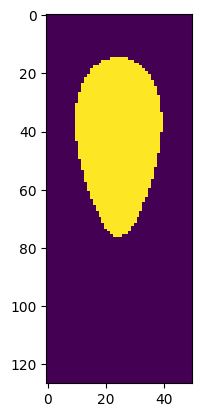

In [21]:
from matplotlib import pyplot as plt

plt.imshow(sampled_pad[:, :, sampled_pad.shape[2]//2],interpolation= 'None')
plt.show()